In [5]:
% load_ext autoreload
% autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Chloropleth Plots for Stats about articles

For example: median views, number of articles, etc

In [6]:
import pandas as pd
import numpy as np

## Load and Preprocess Base DataFrames

In [8]:
df_crawled = pd.read_csv('events/new/processed_0_manually_with_wikiviews_allcorr.csv').drop_duplicates()

df_crawled.event_date = pd.to_datetime(df_crawled.event_date)
df_crawled['views_7_sum_log'] = np.log1p(df_crawled.views_7_sum)
df_crawled['edits_7_sum_log'] = np.log1p(df_crawled.edits_7_sum)

df_reg = df_crawled[(df_crawled.cat != 'undefined') & (df_crawled.year > 2015) & ~(
            (df_crawled.event_date.dt.month == 1) & (df_crawled.event_date.dt.day == 1))]
df_view_reg = df_crawled[(df_crawled.cat != 'undefined') & (df_crawled.year > 2015) & ~(
            (df_crawled.event_date.dt.month == 1) & (df_crawled.event_date.dt.day == 1)) & (
                                     df_crawled.views_7_sum > 10)]
df_edit_reg = df_crawled[(df_crawled.cat != 'undefined') & (df_crawled.year > 2015) & ~(
            (df_crawled.event_date.dt.month == 1) & (df_crawled.event_date.dt.day == 1)) & (df_crawled.edits_7_sum > 0)]

## Plot Chloropleth maps for raw article stats

In [ ]:
from plot import build_chloropleths_df
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.rcParams.update({'font.family': 'sans-serif',
                     'font.sans-serif': 'Noto Sans'})

### Median Views and Edits

views_7_sum_log_country_code_median_de
views_7_sum_log_country_code_median_en
views_7_sum_log_country_code_median_es
views_7_sum_log_country_code_median_it


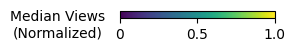

In [12]:
figs_geo, fig_cmap = build_chloropleths_df(df_view_reg, column='views_7_sum_log', group_col='code',
                                           color_data='country', color_map='name_en', cm_chloropleth=mpl.cm.viridis,
                                           relative_scale=True, metric='median', cb_horizontal=True,
                                           cb_label='Median Views\n(Normalized)')
# if you want to see the figures here, uncomment this
#for fig in figs_geo:
#    display(fig)

edits_7_sum_log_country_code_median_de
edits_7_sum_log_country_code_median_en
edits_7_sum_log_country_code_median_es
edits_7_sum_log_country_code_median_it


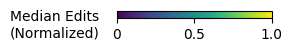

In [13]:
figs_geo, fig_cmap = build_chloropleths_df(df_edit_reg, column='edits_7_sum_log', group_col='code',
                                           color_data='country', color_map='name_en',
                                           cm_chloropleth=mpl.cm.viridis, relative_scale=True, metric='median',
                                           cb_horizontal=True, cb_label='Median Edits\n(Normalized)')
#for fig in figs_geo:
#    display(fig)

### Number of articles with >10 views and >0 edits

views_7_sum_log_country_code_count_de
views_7_sum_log_country_code_count_en
views_7_sum_log_country_code_count_es
views_7_sum_log_country_code_count_it


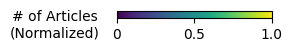

In [14]:
figs_geo, fig_cmap = build_chloropleths_df(df_view_reg, column='views_7_sum_log', group_col='code',
                                           color_data='country', color_map='name_en',
                                           cm_chloropleth=mpl.cm.viridis, relative_scale=True, metric='count',
                                           cb_horizontal=True, cb_label='# of Articles\n(Normalized)')
#for fig in figs_geo:
#    display(fig)

edits_7_sum_log_country_code_count_de
edits_7_sum_log_country_code_count_en
edits_7_sum_log_country_code_count_es
edits_7_sum_log_country_code_count_it


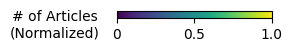

In [15]:
figs_geo, fig_cmap = build_chloropleths_df(df_edit_reg, column='edits_7_sum_log', group_col='code',
                                           color_data='country', color_map='name_en',
                                           cm_chloropleth=mpl.cm.viridis, relative_scale=True, metric='count',
                                           cb_horizontal=True, cb_label='# of Articles\n(Normalized)')
#for fig in figs_geo:
#    display(fig)